# Classifying Dog and Cat using CNN

####**Dataset Description**



The **Dog Vs Cat** image classification dataset consists of 8005 images belonging to 2 classes for training images and 2023 images belonging to 2 classes for testing images


1.   Class I = Dog
2.   Class II= Cat

![alt text](https://imgur.com/d8Qd1hD.gif)


 TensorFlow 2.x
- Convolutional neural network implementation
- Model Improvisation


# Solution: Classifying Dog and Cat using CNN on Tensorflow 2.x

##Pre-process  the Dataset


#####<b>Before start coding please enable your GPU





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### <b> Load the  Dataset

#### <b> Unzip the  Data

In [ ]:
!unzip /content/drive/MyDrive/Colab/training_set.zip -d /content/drive/MyDrive/Colab/
!unzip /content/drive/MyDrive/Colab/test_set.zip -d /content/drive/MyDrive/Colab/

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/Colab/training_set/training_set/cats/cat.3704.jpg  
  inflating: /content/drive/MyDrive/Colab/training_set/training_set/cats/cat.3705.jpg  
  inflating: /content/drive/MyDrive/Colab/training_set/training_set/cats/cat.3706.jpg  
  inflating: /content/drive/MyDrive/Colab/training_set/training_set/cats/cat.3707.jpg  
  inflating: /content/drive/MyDrive/Colab/training_set/training_set/cats/cat.3708.jpg  
  inflating: /content/drive/MyDrive/Colab/training_set/training_set/cats/cat.3709.jpg  
  inflating: /content/drive/MyDrive/Colab/training_set/training_set/cats/cat.371.jpg  
  inflating: /content/drive/MyDrive/Colab/training_set/training_set/cats/cat.3710.jpg  
  inflating: /content/drive/MyDrive/Colab/training_set/training_set/cats/cat.3711.jpg  
  inflating: /content/drive/MyDrive/Colab/training_set/training_set/cats/cat.3712.jpg  
  inflating: /content/drive/MyDrive/Colab/training_set/training_set/ca

#### <b> Visualize the  Data

Populating the interactive namespace from numpy and matplotlib


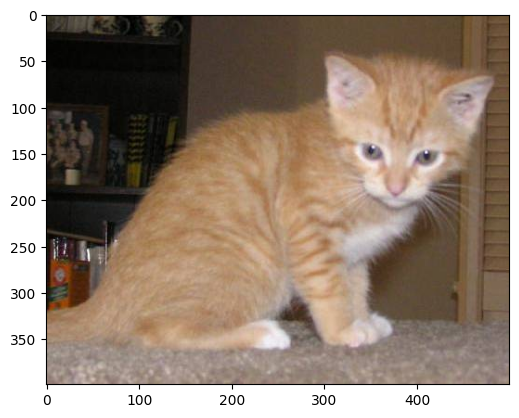

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('/content/drive/MyDrive/Colab/test_set/test_set/cats/cat.4003.jpg')
imgplot = plt.imshow(img)
plt.show()


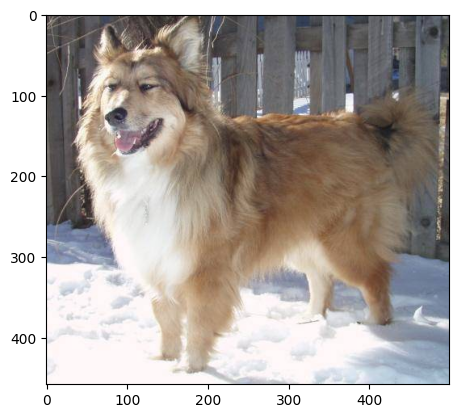

In [ ]:
img=mpimg.imread('/content/drive/MyDrive/Colab/test_set/test_set/dogs/dog.4006.jpg')
imgplot = plt.imshow(img)
plt.show()


##  Import Libraries

In [ ]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#####Check the TensorFlow version

In [ ]:
print(tensorflow.__version__)

2.15.0


## Designing the Model

#### <b> Initialize the parameters

In [ ]:
img_width, img_height = 150,150  #width and height of the images
train_data_dir = r"/content/drive/MyDrive/Colab/training_set/training_set"
validation_data_dir=r"/content/drive/MyDrive/Colab/test_set/test_set"
nb_train_sample =100
nb_validation_samples =100
epochs =20
batch_size= 20

#### <b> Check the shape of the image

In [ ]:
import tensorflow.keras.backend as k
if k.image_data_format()=='channels_first':
    input_shape=(3, img_width, img_height)
else:
    input_shape=(img_width,img_height,3)


#### <b> Generate Images to train the model



1.   Rescale
2.   Shear_range
3.   Zoom_range
4.  Horizontal_flip

![alt text](https://i.imgur.com/Az24gjL.png)


- This class allows to configure random transformations and normalization on the allocated image during training time
- Prevents overfitting and helps to generate a generalize model
- Never repeats the exact same images twice  to train our model




In [ ]:
train_datagen=ImageDataGenerator ( rescale=1. /255,shear_range =0.2,zoom_range=0.2,horizontal_flip =True)


test_datagen=ImageDataGenerator (rescale=1. /255)


train_generator =train_datagen.flow_from_directory(train_data_dir,target_size =(img_width,img_height), batch_size=batch_size,class_mode='binary',classes=['cats','dogs'])
#Now this, will generate training generator data
#Target_size = mentioned image_width and image_height
#Batch_size = 20 (already mentioned)
#Class_mode = binary(because here only two classes are there to classify)


validation_generator =test_datagen.flow_from_directory(validation_data_dir,target_size =(img_width,img_height), batch_size=batch_size,class_mode='binary')
#Now, this will generate testing generator data
#Target_size = mentioned image_width and image_height
#Batch_size = 20 (already mentioned)
#Class_mode = binary(because here only two classes are there to classify)



Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


####**Visual Representation of ImageDataGenerator**

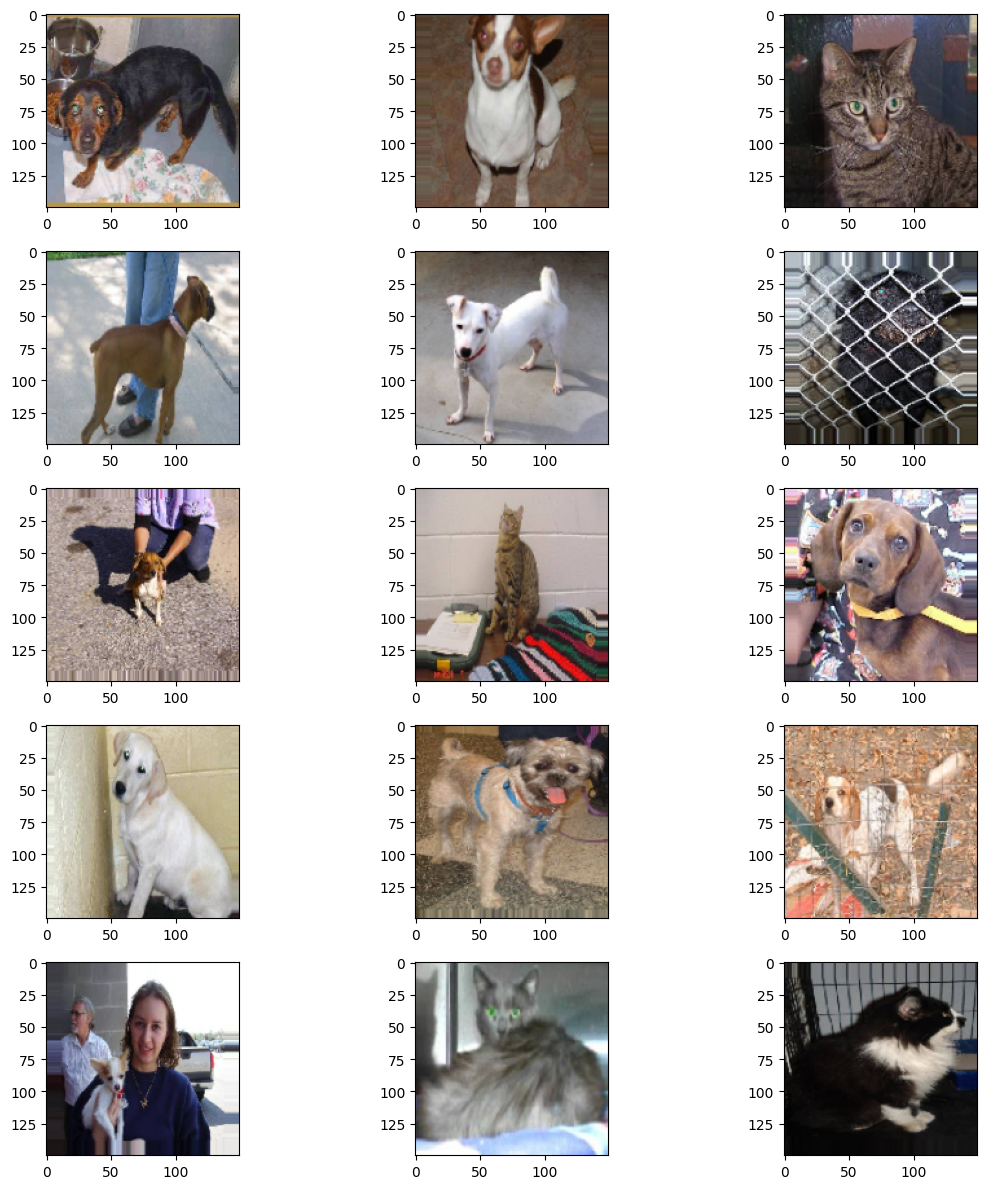

In [ ]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in train_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

### <b> Build the basic CNN model 0

####<b> Layers in CNN:


<b>

1.   Conlutional Layer
2.   ReLu
3. Pooling Layer
4. Fully Connected Layer (Dense)


![alt text](https://i.imgur.com/P4yvxRW.png)

In [ ]:
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape=input_shape)) #64 neurons with 3*3 filter
#This class allows to create convolutional neural network to extract feature from the images

model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))#MaxPooling2D helps to reduce the size of the data

model.add(Flatten())#Converts multi dimensional array to 1D channel
model.add(Dense(64)) #64 neurons with 3*3 filter
#Numbers of output nodes in the hidden layer
model.add(Activation('relu'))
model.add(Dense(1)) #output layer
model.add(Activation('sigmoid')) #sigmoid activation function
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 activation (Activation)     (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 350464)            0         
                                                                 
 dense (Dense)               (None, 64)                22429760  
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                        

#### <b> Compile the basic CNN model

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 activation (Activation)     (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 350464)            0         
                                                                 
 dense (Dense)               (None, 64)                22429760  
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                        

#### <b> Fit the basic CNN model

In [ ]:
training = model.fit_generator(train_generator,
                   steps_per_epoch=nb_train_sample,epochs=epochs,
                   validation_data=validation_generator,
                       validation_steps=nb_validation_samples)

<ipython-input-13-f6f9d28e26eb>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  training = model.fit_generator(train_generator,


Epoch 1/20
100/100 [==============================] - 505s 5s/step - loss: 0.6610 - accuracy: 0.6170 - val_loss: 0.6248 - val_accuracy: 0.6470
Epoch 2/20
100/100 [==============================] - 154s 2s/step - loss: 0.6410 - accuracy: 0.6265 - val_loss: 0.6043 - val_accuracy: 0.6685
Epoch 3/20
100/100 [==============================] - 132s 1s/step - loss: 0.6435 - accuracy: 0.6505 - val_loss: 0.6308 - val_accuracy: 0.6445
Epoch 4/20
100/100 [==============================] - 113s 1s/step - loss: 0.6266 - accuracy: 0.6535 - val_loss: 0.6038 - val_accuracy: 0.6745
Epoch 5/20
100/100 [==============================] - 95s 953ms/step - loss: 0.6049 - accuracy: 0.6720 - val_loss: 0.5749 - val_accuracy: 0.6970
Epoch 6/20
100/100 [==============================] - 95s 946ms/step - loss: 0.5966 - accuracy: 0.6720 - val_loss: 0.5737 - val_accuracy: 0.7050
Epoch 7/20
  9/100 [=>............................] - ETA: 53s - loss: 0.5765 - accuracy: 0.6722

#### <b> Find the accuracy score


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


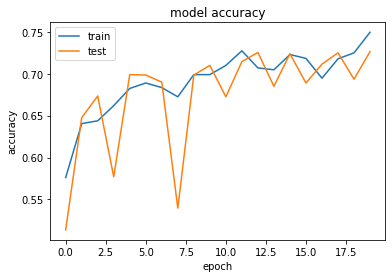

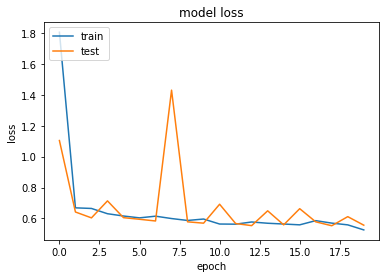

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


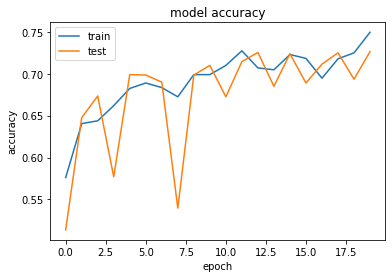

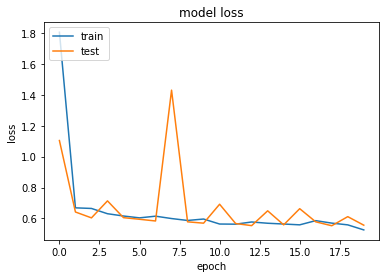

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### <b> Predict the image


[[1.]]
Prediction:  Dog


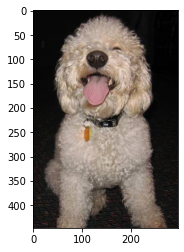

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred = image.load_img("/content/drive/MyDrive/Colab/test_set/test_set/dogs/dog.4003.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/drive/MyDrive/Colab/test_set/test_set/dogs/dog.4003.jpg')
imgplot = plt.imshow(img)
plt.show()


####<b> Predict the image


[[0.9999852]]
Prediction:  Cat


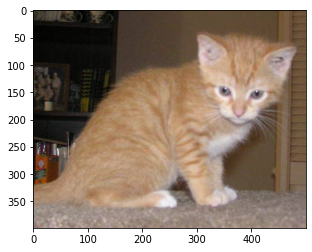

In [ ]:
img_pred = image.load_img("/content/drive/MyDrive/Colab/test_set/test_set/cats/cat.4003.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/drive/MyDrive/Colab/test_set/test_set/cats/cat.4003.jpg')
imgplot = plt.imshow(img)
plt.show()


### <b> Build the basic CNN model 1

####<b> Let's add add some layers to prevent ovetfitting


**Dropout:** used to deactive some neurons randomly to prevent overfitting
<br>
**Early Stop:**
To prevent over fitting we will stop the learning after 10 epochs and val_loss value not decreased
<br>
**Learning Rate Reduction:**
We will reduce the learning rate when then accuracy not increase for 2 steps
- monitor: quantity to be monitored.
- factor: factor by which the learning rate will be reduced. new_lr = lr * factor
- patience: number of epochs with no improvement after which learning rate will be reduced.
- verbose: int. 0: quiet, 1: update messages.
- mode: one of {auto, min, max}. In min mode, lr will be reduced when the quantity monitored has stopped decreasing; in max mode it will be reduced when the quantity monitored has stopped increasing; in auto mode, the direction is automatically inferred from the name of the monitored quantity.
- min_delta: threshold for measuring the new optimum, to only focus on significant changes.
- cooldown: number of epochs to wait before resuming normal operation after lr has been reduced.
- min_lr: lower bound on the learning rate.



In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=10)
# ReduceLROnPlateau: Reduce learning rate when a metric has stopped improving
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)


callbacks = [earlystop, learning_rate_reduction]

model1 = Sequential()
model1 = Sequential()
model1.add(Conv2D(64,(3,3),input_shape=input_shape)) #64 neurons with 3*3 filter
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Flatten())
model1.add(Dense(64)) #64 neurons with 3*3 filter
model1.add(Activation('relu'))
model1.add(Dropout(0.5))#Prevents overfitting of the model and it has the effect of reducing the capacity or thinning the network during training
model1.add(Dense(1)) #output layer
model1.add(Activation('sigmoid')) #sigmoid activation function
model1.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
activation_3 (Activation)    (None, 148, 148, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 350464)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                22429760  
_________________________________________________________________
activation_4 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout (Dropout)            (None, 64)               

#### <b> Compile the basic CNN model1

In [ ]:
model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
activation_3 (Activation)    (None, 148, 148, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 350464)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                22429760  
_________________________________________________________________
activation_4 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout (Dropout)            (None, 64)               

#### <b> Fit the basic CNN model1

In [ ]:
training = model1.fit_generator(train_generator,
                   steps_per_epoch=nb_train_sample,epochs=epochs,
                   validation_data=validation_generator,
                       validation_steps=nb_validation_samples,callbacks=callbacks)

Epoch 1/20


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


100/100 [==============================] - 19s 187ms/step - loss: 2.3821 - accuracy: 0.5292 - val_loss: 0.6966 - val_accuracy: 0.5125
Epoch 2/20
100/100 [==============================] - 19s 186ms/step - loss: 0.6768 - accuracy: 0.5881 - val_loss: 0.6594 - val_accuracy: 0.6120
Epoch 3/20
100/100 [==============================] - 18s 184ms/step - loss: 0.6526 - accuracy: 0.6141 - val_loss: 0.6605 - val_accuracy: 0.6455
Epoch 4/20
100/100 [==============================] - 18s 183ms/step - loss: 0.6651 - accuracy: 0.6096 - val_loss: 0.6699 - val_accuracy: 0.6015
Epoch 5/20
100/100 [==============================] - 18s 185ms/step - loss: 0.6278 - accuracy: 0.6402 - val_loss: 0.6520 - val_accuracy: 0.6565
Epoch 6/20
100/100 [==============================] - 19s 186ms/step - loss: 0.6174 - accuracy: 0.6510 - val_loss: 0.6242 - val_accuracy: 0.6630
Epoch 7/20
100/100 [==============================] - 18s 184ms/step - loss: 0.6049 - accuracy: 0.6732 - val_loss: 0.6227 - val_accuracy: 0.6

#### <b> Find the accuracy score


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### <b> Predict the image


[[1.]]
Prediction:  Dog


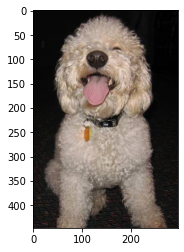

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred = image.load_img("/content/drive/MyDrive/Colab/test_set/test_set/dogs/dog.4003.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

result = model1.predict(img_pred)
print(result)
if result[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/drive/MyDrive/Colab/test_set/test_set/dogs/dog.4003.jpg')
imgplot = plt.imshow(img)
plt.show()


[[1.]]
Prediction:  Dog


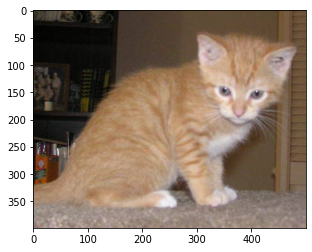

In [ ]:
img_pred = image.load_img("/content/drive/MyDrive/Colab/test_set/test_set/cats/cat.4003.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model1.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat" #int('Prediction: ',prediction)
print('Prediction: ',prediction)

img=mpimg.imread('/content/drive/MyDrive/Colab/test_set/test_set/cats/cat.4003.jpg')
imgplot = plt.imshow(img)
plt.show()


### <b> Build the basic CNN model 2

![alt text](https://i.imgur.com/wpLHgqN.jpg)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=10)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)


callbacks = [earlystop, learning_rate_reduction]

model2 = Sequential()
model2.add(Conv2D(32,(3,3),input_shape=input_shape))
#model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Dense(1, activation='softmax')) # 2 because we have cat and dog classes




#### <b> Compile the basic CNN model2

In [ ]:
#model2.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 148, 148, 32)      128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 72, 72, 64)        256       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 36, 36, 64)       

#### <b> Fit the basic CNN model2

In [ ]:
training = model2.fit_generator(train_generator,
                   steps_per_epoch=nb_train_sample,epochs=epochs,
                   validation_data=validation_generator,
                       validation_steps=nb_validation_samples,callbacks=callbacks)

Epoch 1/20


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


100/100 [==============================] - 21s 192ms/step - loss: 1.2879 - accuracy: 0.5159 - val_loss: 0.9018 - val_accuracy: 0.5000
Epoch 2/20
100/100 [==============================] - 19s 190ms/step - loss: 0.8278 - accuracy: 0.4947 - val_loss: 0.8580 - val_accuracy: 0.4995
Epoch 3/20
100/100 [==============================] - 19s 192ms/step - loss: 0.8014 - accuracy: 0.4666 - val_loss: 1.0213 - val_accuracy: 0.5005
Epoch 4/20
100/100 [==============================] - 19s 192ms/step - loss: 0.7001 - accuracy: 0.5010 - val_loss: 0.7452 - val_accuracy: 0.5015
Epoch 5/20
100/100 [==============================] - 19s 192ms/step - loss: 0.6452 - accuracy: 0.5097 - val_loss: 0.6333 - val_accuracy: 0.5015
Epoch 6/20
100/100 [==============================] - 19s 191ms/step - loss: 0.6410 - accuracy: 0.5229 - val_loss: 0.6217 - val_accuracy: 0.5000
Epoch 7/20
100/100 [==============================] - 19s 192ms/step - loss: 0.5787 - accuracy: 0.5078 - val_loss: 0.6553 - val_accuracy: 0.4

#### <b> Find the accuracy score


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


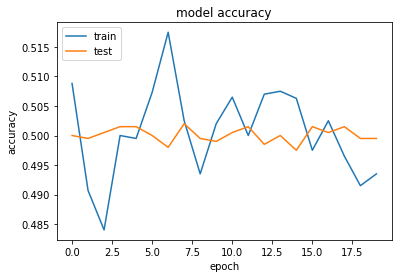

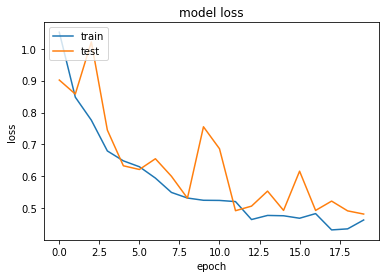

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### <b> Predict the image


[[1.]]
Prediction:  Dog


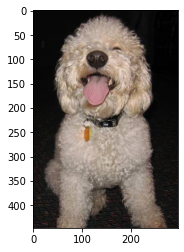

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred = image.load_img("/content/drive/MyDrive/Colab/test_set/test_set/dogs/dog.4003.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

result = model2.predict(img_pred)
print(result)
if result[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/drive/MyDrive/Colab/test_set/test_set/dogs/dog.4003.jpg')
imgplot = plt.imshow(img)
plt.show()


[[1.]]
Prediction:  Dog


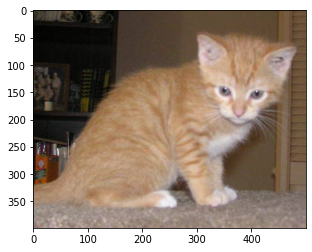

In [ ]:
img_pred = image.load_img("/content/drive/MyDrive/Colab/test_set/test_set/cats/cat.4003.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model2.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/drive/MyDrive/Colab/test_set/test_set/cats/cat.4003.jpg')
imgplot = plt.imshow(img)
plt.show()
